# Bias Testing Within Word Embeddings

## Overview

### Bias Type

We wanted to explore potential generational bias in word and sentence embeddings **using a GloVe embedding and a BERT transformer.** But instead of directly assessing sentiment analysis for words like old vs. young, or grandchildren vs. grandparents, we decided to use names common to certain generations, similar to the bias detection names of different ethnicities and genders.

To source our data, we used the Social Security Administration's publically available dataset of the top 1000 names for each gender for each birth year, and the total yearly counts. This data can be found at the following link: [Social Security Administration website](https://www.ssa.gov/oact/babynames/limits.html). There are potential problems with the Social Security Administration's baby names dataset: The Social Security only started enrolling people in 1937, so for people born prior to 1937, there is literal survivorship bias, in that people in the SSA database prior to 1937 had to be born in the specific year and survive long enough to enroll.  The survivorship of different regional, racial, ethnic, gender, class and political groups will be different, thus the people who were born in 1880, and then enrolled in Social Security in and around 1937 are not the complete number of baby Americans born in 1880.

Because of the increasing population of the United States, and overall fluctuations in yearly birthrates, the raw counts of names would be unhelpful for making generational comparisons, or even year to year comparisons.  So yearly proportions of names will be used.

As for the generations themselves, we used the common generational names and date ranges reported in wikipedia: [Generation Wiki](https://en.wikipedia.org/wiki/Generation)

![from Wikipedia:](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Generation_timeline.svg/900px-Generation_timeline.svg.png)

Also for more current names, the SSA does not provide names with raw counts of less than 5 per year, even if these names would be in the yearly top 1000 names since this publically identifiabe information could be used against people.  Graph 1 shows the percentage of persons included in the SSA yearly database, but not named in the SSA babyname database.  The rare unlisted names never account for more than 10% of the population.

![Graph 1](https://github.com/cameronervin/NN-Projects/blob/main/lab1/graphs/Percent%20of%20Total%20Persons%20Not%20Included.png?raw=true)

However A name that appeared in the SSA's full database with raw counts in successive years: 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1 would only be included in the SSA's publically available database as 5, 6, 5 for the 5th, 6th, and 7th years, which would undercount the total generational use by 20.  Since generations are approximately 20 years long (though getting shorter), this means that names with a total counts per generation less than 100 are likely unreliable.  Graph 2 shows these percentages per generation, and they are not higher than 4%.  So even in a worst case scenario, we are focusing on the top 85% of names in a generation, and generally more. However, this means we should have more stringent statistical tests.

![Graph 2](https://github.com/cameronervin/NN-Projects/blob/main/lab1/graphs/Percent%20of%20Rare%20Names.png?raw=true)

Name popularity goes through fads and cycles, which doesn't necessarily overlap with generations.  Also the proportions of top names are distributed differently across the generations.

![Graph 3](https://github.com/cameronervin/NN-Projects/blob/main/lab1/graphs/Proportions%20with%20Top%20100.png?raw=true)

So instead of raw counts of names, or raw ranks of top 100 of names, to establish the most popular names used in a generation, we compared each name's proportions within a generation across each generation.

![Graph 4](https://github.com/cameronervin/NN-Projects/blob/main/lab1/graphs/Percent%20of%20Girls%20Named%20Karen.png?raw=true)

The generation for which the name was most popular (by percentage of the total), is then considered to have that name, for the purposes of identifying generational bias.

### Relevancy

Our analysis of bias in the baby names dataset, we are essentially investigating whether there are systematic or unfair preferences or trends in the selection of names for children born in the USA over the years. The bias you're focusing on could manifest in various ways, such as gender bias, cultural bias, or popularity bias.

How your investigation is relevant:

1. **Importance of Identifying Bias**: Finding bias in machine learning models, including natural language processing (NLP) models like GloVe, is crucial because biased models can perpetuate unfairness and inequality. If there's bias in the baby names dataset, it could reflect societal biases in naming conventions, cultural preferences, or historical trends.

2. **Relevance to Other Researchers and Practitioners**: Our investigation into bias in baby names can be relevant to researchers and practitioners in several ways:
   - Researchers in linguistics, sociology, and cultural studies might be interested in understanding how naming trends reflect societal attitudes and norms.
   - Data scientists and machine learning practitioners can learn from our analysis techniques for detecting bias in datasets and models, which is essential for building fair and ethical AI systems.
   - Policy makers and educators may use insights from your analysis to address biases in societal systems related to gender, ethnicity, or culture.

3. **Understanding Bias in Data**: When we say bias exists in the data, it means that the data systematically deviates from representing a fair or unbiased view of the underlying phenomenon. Bias can occur due to various factors, such as sampling biases (e.g., underrepresentation of certain groups), measurement biases (e.g., errors in data collection), or societal biases (e.g., stereotypes or prejudices encoded in language or cultural practices). In the context of baby names, bias could arise if certain names are more common or preferred for specific genders, ethnicities, or social classes, reflecting underlying societal biases or cultural norms.

By investigating bias in the baby names dataset and considering the implications for machine learning models like GloVe, our team is contributing to the broader discussion on fairness, transparency, and accountability in AI and data science.

For example, you might observe shifts in the popularity of certain names or disparities in the distribution of names between genders across different time periods. These trends could reflect societal attitudes, cultural norms, or historical events that influenced naming practices for boys and girls.

Analyzing the data over various time intervals allows you to capture long-term trends as well as more localized changes, providing a comprehensive understanding of how gender biases in names have evolved over time. Additionally, by comparing different time intervals, you can assess whether certain biases have persisted, diminished, or emerged in different historical contexts.

Overall, our analysis has the potential to uncover valuable insights into historical gender biases in baby names, contributing to our understanding of cultural norms, societal attitudes, and the dynamics of naming practices over time.

### Methodology

We will be using a Recurrent Neural Network with a glove.6B.300d GloVe embedding and a separate model with a **DistilBERT** transformer embedding and dense layers on top of our DistilBERT transformer. The GloVe embedding can be found using the following link: [the GloVe web page](https://nlp.stanford.edu/projects/glove/), and we will be using the Hugging Face implementation of DistilBERT. We chose to use DistilBERT because according to HuggingFace, DistilBERT uses "40% less parameters than google-bert/bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark."

#### GloVe

The GloVe (Global Vectors for Word Representation) model is a type of word embedding that enables words to be represented as vectors in a high-dimensional space. GloVe was developed at Stanford as an open-source project. The model is designed to capture the occurrence of words in a corpus and the co-occurrence patterns among them. This approach allows the model to learn the relationships between words based on the context they appear in, thereby encoding semantic and syntactic similarities between words into their vector representations. We will be using glove.6B.300d GloVe.

**6B:** The model was trained on a dataset comprising 6 billion words

**300d:** Each word is represented as a 300-dimensional vector

Example of GloVe's representation of words in a vector space:
![title](https://analyticsindiamag.com/wp-content/uploads/2021/08/scatter.png)

#### BERT/DistilBERT
##### **BERT:**
BERT (Bidirectional Encoder Representations from Transformers) is a method of pre-training language representations developed by Google which utilizes an encoder only transformer architecture. Additionally, BERT was first published in the paper "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Delvi, et al. We will use BERT, and more specifically DistilBERT for classification.

Encoder-Only Transformer Architecture:
![title](https://www.researchgate.net/publication/349880253/figure/fig1/AS:998921530789890@1615172860585/Transformer-Encoder-Architecture-BERT-or-Bidirectional-Encoder-Representations-from.ppm)

##### **DistilBERT:**
DistilBERT was introduced in the paper " DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter" by Sanh, et al. As the name of the model suggests, DistilBERT is a distilled version of base BERT which boasts "40% less parameters than google-bert/bert-base-uncased, runs 60% faster while preserving over 95% of BERT's performances." We chose to use DistilBERT due to its efficiency.

Graph showing the number of parameters used by DistilBERT amongst other models:
![title](https://production-media.paperswithcode.com/methods/distilbert_COTEMhF.png)


#### Comparing The Architecture Our Two Models:
Both of our models wil utilize a form of embedding - one model with a GloVe embedding and an RNN architecture and the other with a DistilBERT transformer embedding followed by dense layers. However, the two architectures function differently:

**GloVe + RNN:**
- RNNs are designed to process sequences of data, one element at a time, with the output of one step feeding into the input of the
- RNNs suffer from vanishing and exploding gradient problems


**BERT/DistilBERT:**
- BERT is based on the Transformer architecture, which avoids recurrent processing in favor of attention mechanisms that weigh the importance of different words in a sentence, regardless of their position
- BERT is designed as a deeply bidirectional model, meaning that it learns information from both the left and the right context of a token in all layers

RNNs base predictions off of the last input and the order tokens are fed into the model sequentially. Meanwhile, BERT is an attention model that can calculate the weight of each token in a sequence with respect to position. With BERT, this can also be performed in parallel.

### Research Questions

**1)** To what extent does a sentiment analysis of BERT exhibit a bias towards names of different genders in comparison to GloVe?

**2)** Does a sentiment analysis of BERT exhibit a bias towards certain generations based on popular names?  If so, biased towards which generations?

**3)** Does the gender bias change across generations or moderate generational bias?

 #### Statstical Methods:

Because Name frequency follows a non-normal Zipf distribution, we will use weighted statistical tests in addition to standard statistical tests and the results of the weighted tests will be considered more relevant than the unweighted tests.

To answer RQ1, we will conduct two t-test, the first is a simple T-test of the difference in the sentiment analysis scores of the names.  The second is a weighted t-test, where each name is weighted by population proportion, so that names used more often count more.


To answer RQ2, we need to divide the data into generations, but since names can show up in multiple generations (but in different proportions), we'll use several different methods, the results of which should converge.

For all statistical tests, we'll use a fixed effect linear regression but with effect coding.  Regular Fixed effect linear regression will assign a dummy code (one-hot) to each generation, centered on one base generation, and will then estimates the difference in means between the base generation and the others.  Effect coding, instead of testing against one specific generation, tests againsts a clustered mean, which in the case of this data will be relatively close to the true mean for the weighted regressions.  

First, we use an exclusive list of names for each Generation, based on generation in which the name was most popular, i.e. Karen counts as a Boomer name.  We run a simple fixed effect linear regression with effect coding for the generational variables.

Second we do the same fixed effect regression, but now with proportional weights for each name, based on frequency in the exclusive list population.

Third we do the same fixed effect regression with effect coding for generational variables, but now using an inclusive list, where each name can be in different generations, but at different proportions.  Karen will be weighted most for the Boomers, but also for Silent, Gen_X, etc.


To answer RQ3, we'll run the same three regressions by name, but now with interaction by gender terms.  This allows us to estimate the difference in gender bias within and across each generation.

## Code

In [1]:
# to use distilbert model as an embedding, downgrade tensorflow
from IPython.display import clear_output
!pip uninstall tensorflow -y
!pip install tensorflow==2.9.0
!pip install --user -U nltk spacy
clear_output()

# standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to save models
import pickle

# imports for natural language cleaning
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re,string

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# tensorflow imports
import tensorflow as tf
from tensorflow.keras import utils, layers, Sequential, models
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# DistilBert HuggingFace imports
from transformers import AutoTokenizer, TFDistilBertModel, DistilBertConfig

# DistilBert config
SEED = 64
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE

### Loading In Our Data

First, we load our data in that we will use to train our sentiment classifier. Our dataset is a collection of movie reviews. There are two features in this dataset: 'review' which is corpus movie review text and 'sentiment' which is a label of either positive or negative. The dataset can be found on [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

In [2]:
colab = True

if colab:
    from google.colab import drive
    drive.mount('/content/drive')

    import zipfile
    # IMDB Dataset
    with zipfile.ZipFile('/content/drive/MyDrive/IMDB Dataset.csv.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/data')
      zip_ref.close()

    # GloVe
    with zipfile.ZipFile('/content/drive/MyDrive/glove.6B.300d.txt.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/data')
      zip_ref.close()

    # Names
    with zipfile.ZipFile('/content/drive/MyDrive/names_80percent.csv.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/data')
      zip_ref.close()

    df = pd.read_csv('/content/data/IMDB Dataset.csv')
else:
    df = pd.read_csv('data/IMDB Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Understanding the format of our data.

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Convert the sentiment values to a binary.

In [5]:
sentiment = {'positive' : 1, 'negative' : 0}
df['sentiment'] = [sentiment[item] for item in df['sentiment']]

### Cleaning Our Data

Now, we will clean our data before using the data to train our models.

In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

We will remove stop words using the natural language tool kit. Stop words are words such as like, the, etc. that do not have much impact on the meaning of a sentence.

In [7]:
if colab:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Now, to implement our stop words and perform data cleaning. Functions used from [this Kaggle Notebook](https://www.kaggle.com/code/madz2000/sentiment-analysis-cleaning-eda-bert-88-acc).

In [9]:
# Removing HTML text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

# Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Apply function on review column
df['review']=df['review'].apply(denoise_text)

<ipython-input-9-3cd9a5225f8d>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Rename our column headers.

In [10]:
df = df.rename(columns = {"review":"text","sentiment":"label"})

In [11]:
df.head()

,text,label
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


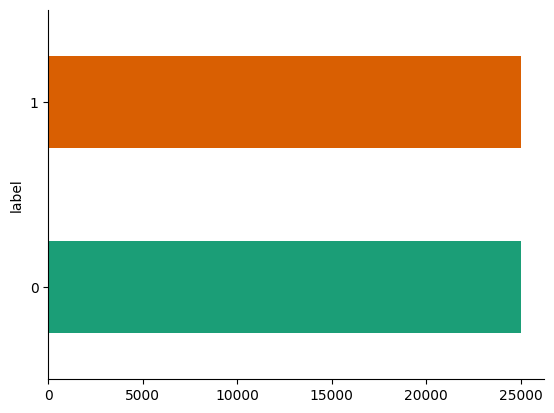

In [12]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Creating Our GloVe Embedding RNN Model

First, we will load in our GloVe embedding using the following function.

In [13]:
def load_embeddings(filename):
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)

    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

if colab:
  glove = load_embeddings('/content/data/glove.6B.300d.txt')
else:
  glove = load_embeddings('data/glove.6B.300d.txt')
glove.shape

(400000, 300)

Next, we will tokenize our data from the cleaned IMDB dataset. We will also use a max sequence length of 128 with padding for reviews that do not have 128 tokens to ensure that all of our sequences are the same length for our model.

In [14]:
tokenizer_glove = Tokenizer()
tokenizer_glove.fit_on_texts(df['text'])
vocab_size = len(tokenizer_glove.word_index) + 1

max_sequence_length = 128
sequences_glove = tokenizer_glove.texts_to_sequences(df['text'])
padded_sequences_glove = pad_sequences(sequences_glove, maxlen=max_sequence_length, padding='post', truncating='post')

After, we will create our embedding matrix of the tokens present in our dataset as well as in the GloVe embedding.

In [15]:
def create_embedding_matrix(word_index, embeddings_index, embedding_dim, tokenizer, vocab_size):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)

        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [16]:
embedding_dim = 300  # GloVe has dimension of 300
glove_matrix = create_embedding_matrix(tokenizer_glove.word_index, glove, embedding_dim, tokenizer_glove, vocab_size)

We also label encode our label column.

In [17]:
labels = df['label'].tolist()
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

Splitting our data.

In [18]:
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(padded_sequences_glove, labels, test_size=0.2, random_state=64)

Finally, we build our model. We chose to utilize the recurrent nature of Recurrent Neural Networks. RNNs are often times used with sequential data such as text in NLP tasks.

In [19]:
glove_model = Sequential()

glove_model.add(Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[glove_matrix],
                  input_length=max_sequence_length,
                  trainable=True))
glove_model.add(LSTM(64, return_sequences=True))
glove_model.add(Dropout(0.5))
glove_model.add(LSTM(32))
glove_model.add(Dropout(0.5))
glove_model.add(Dense(2,activation='softmax'))

In [20]:
glove_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-05), loss = tf.keras.losses.SparseCategoricalCrossentropy(),  metrics = ['accuracy'])
glove_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 300)          25062900  
                                                                 
 lstm (LSTM)                 (None, 128, 64)           93440     
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 25,168,822
Trainable params: 25,168,822
No

Let's visualize our model.

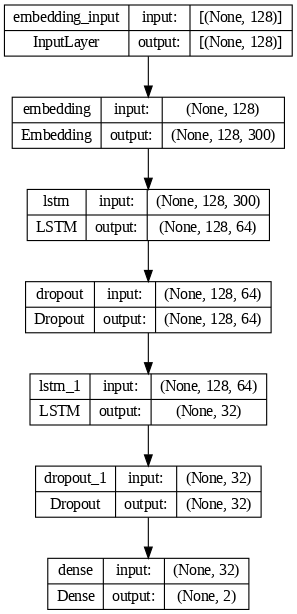

In [21]:
tf.keras.utils.plot_model(glove_model, show_shapes=True, dpi=80)

Once the model does not improve after 2 epochs, we will restore the highest weights.

In [22]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

Training our GloVe model.

In [23]:
glove_history = glove_model.fit(X_train_glove, y_train_glove, epochs=200, batch_size=BATCH_SIZE, validation_data=(X_test_glove, y_test_glove), callbacks=[callbacks])

Epoch 1/200
1250/1250 [==============================] - 203s 160ms/step - loss: 0.5571 - accuracy: 0.6656 - val_loss: 0.3290 - val_accuracy: 0.8631
Epoch 2/200
1250/1250 [==============================] - 198s 159ms/step - loss: 0.2597 - accuracy: 0.9002 - val_loss: 0.3180 - val_accuracy: 0.8694
Epoch 3/200
1250/1250 [==============================] - 199s 159ms/step - loss: 0.1649 - accuracy: 0.9431 - val_loss: 0.3406 - val_accuracy: 0.8637
Epoch 4/200
1250/1250 [==============================] - 198s 159ms/step - loss: 0.1062 - accuracy: 0.9672 - val_loss: 0.4398 - val_accuracy: 0.8592


Plotting our models performance.

In [25]:
def plot_training_validation_acc(history, name, smooth=False, smooth_factor=0.8):
    def smooth_curve(points, factor=0.8):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    if smooth:
        acc = smooth_curve(acc)
        val_acc = smooth_curve(val_acc)
        loss = smooth_curve(loss)
        val_loss = smooth_curve(val_loss)

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.savefig(f"{name}_accuracy.png")

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.savefig(f"{name}_loss.png")

    plt.show()

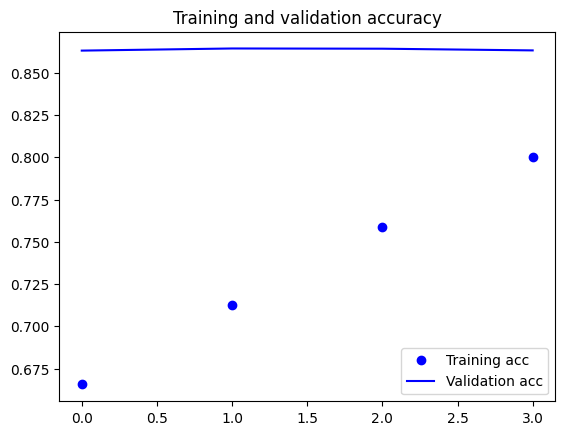

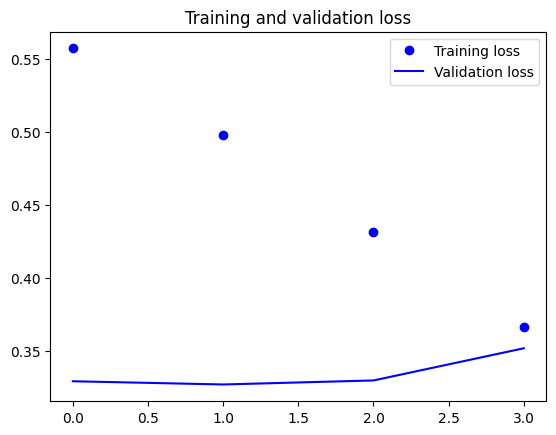

In [26]:
plot_training_validation_acc(glove_history, name = "GloVe", smooth = True)

### Creating Our BERT Model

Configuring and loading in our DistilBERT model. We are using the base and uncased version of DistilBERT. Again, like with our GloVe model, we chose to set the max sequence length to 128.

In [27]:
checkpoint = "distilbert-base-uncased"
config = DistilBertConfig(vocab_size=50265, max_length=128)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
distil_bert = TFDistilBertModel.from_pretrained(checkpoint,config)
MAX_LEN = 128

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Now, let's tokenize our text by creating a tokenize text function. The function takes the input data and max length as data and returns the tokenized text column and the original token labels.

In [28]:
def tokenize_text(input, max_len=512):
    return (tokenizer(text=input['text'].tolist(), add_special_tokens=True,
                    max_length= max_len, truncation=True, padding=True, return_tensors='tf',
                    return_token_type_ids=False, return_attention_mask=True, verbose=True), input['label'])

We will also split our data again since the data needed for DistilBERT is different thant the data needed for our GloVe RNN.

In [29]:
train, test = train_test_split(df, stratify=df['label'], test_size=0.2, random_state=64)

Feeding our data through the tokenize text function.

In [30]:
train_encoded, train_labels = tokenize_text(train, MAX_LEN)
test_encoded, test_labels = tokenize_text(test, MAX_LEN)

This parsing function breaks the 'text' column down into two columns. When we tokenize our data, the text column is converted in to an array of two columns - 'input_ids' and 'attention_masks'. Input IDs are the vectorized words from the text, and attention masks either block or allow a word with a list of binary values. This way, we are separating our text column into two columns.

In [31]:
def parsing(text, label):
    input_ids = text['input_ids']
    attention_mask = text['attention_mask']

    return {'input_ids': input_ids, 'attention_mask' : attention_mask}, label

Create TensorFlow datasets from our encoded text and labels and parse our data.

In [32]:
train_loader = tf.data.Dataset.from_tensor_slices((train_encoded, train_labels))
train_dataset = (train_loader.map(parsing, num_parallel_calls = AUTO).shuffle(BATCH_SIZE*10).batch(BATCH_SIZE).prefetch(AUTO))

test_loader = tf.data.Dataset.from_tensor_slices((test_encoded, test_labels))
test_dataset = (test_loader.map(parsing, num_parallel_calls = AUTO).batch(BATCH_SIZE).prefetch(AUTO))

To create our TensorFlow model, we won't use the Sequentual API since DistilBert is a Hugging Face model, and this would require creating a custom layer class.

In [33]:
# create distil_bert embedding layer
input_ids = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
input_mask = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")
embeddings = distil_bert(input_ids, attention_mask=input_mask)[0]

# create tensorflow model layers
X = GlobalMaxPool1D()(embeddings)
X = Dense(256, activation='gelu')(X)
X = Dropout(0.3)(X)
X = Dense(64,activation = 'gelu')(X)
X = Dropout(0.1)(X)
out = Dense(2,activation = 'softmax')(X)

# create model
distilbert_model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=out)

# set DistilBert layer as trainable
distilbert_model.layers[2].trainable = True

distilbert_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-05), loss = tf.keras.losses.SparseCategoricalCrossentropy(),  metrics = ['accuracy'] )
distilbert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 128, 768),                                                   
                                 hidden_states=None                                           

Again, let's visualize our model.

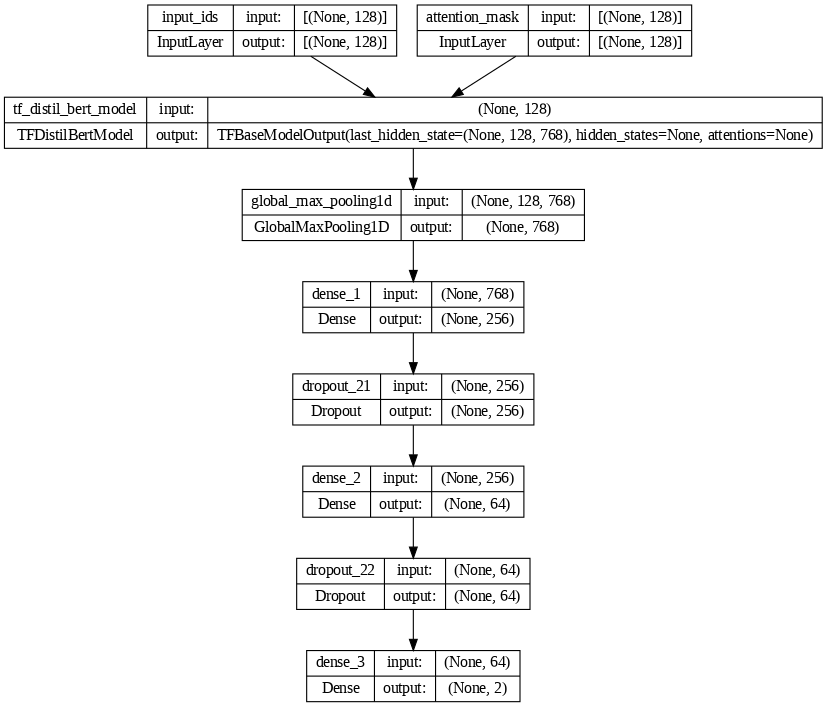

In [34]:
tf.keras.utils.plot_model(distilbert_model, show_shapes=True, dpi=80)

Since the training for a DistilBERT or BERT model takes so long, we will use fewer epochs. We will only use two epochs to avoid overfitting, and we are only using our early stopping callback to ensure we restore the best weights.

In [35]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)

In [36]:
distilbert_history = distilbert_model.fit(train_dataset, validation_data=test_dataset, epochs=2, callbacks=[callbacks])

Epoch 1/2
1250/1250 [==============================] - 3168s 3s/step - loss: 0.3572 - accuracy: 0.8391 - val_loss: 0.2937 - val_accuracy: 0.8715
Epoch 2/2
1250/1250 [==============================] - 3198s 3s/step - loss: 0.2067 - accuracy: 0.9180 - val_loss: 0.3269 - val_accuracy: 0.8782


Plotting our accuracy.

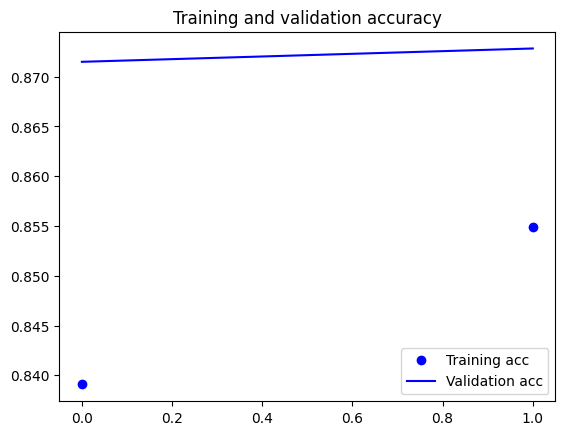

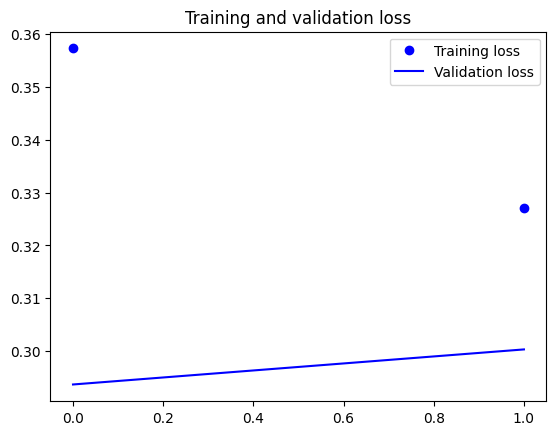

In [38]:
plot_training_validation_acc(distilbert_history, name = "DistilBERT", smooth = True)

### Running Our Models On Our Names Dataset to Find Bias Scores

Loading in the Names dataset as a pandas dataframe.

In [39]:
if colab:
    test_names = pd.read_csv('/content/data/names_80percent.csv')
else:
    test_names = pd.read_csv('data/names_80percent.csv')

Now, we create a function to calculate the sentiment scores from our two models.

In [42]:
def add_log_sentiment_scores_to_dataframe(model, dataset, dataframe, col_name):
    # Ensure the dataframe has the correct structure
    if col_name not in dataframe.columns:
        dataframe[col_name] = np.nan

    # Predict sentiment scores using the model. Assuming the output is in the form [prob_negative, prob_positive].
    predictions = model.predict(dataset)

    # Process each prediction
    for i, (prob_negative, prob_positive) in enumerate(predictions):
        # Calculate log probability ratio
        # To avoid division by zero or log(0), we add a small epsilon value.
        epsilon = 1e-9
        log_sentiment_score = np.log((prob_positive + epsilon) / (prob_negative + epsilon))

        # Add the log sentiment score to the dataframe
        dataframe.at[i, col_name] = log_sentiment_score

    return dataframe

Before calculating the sentiment scores of our names, we must preprocess the data to match the preprocessing for both the GloVe and DistilBERT models. Preprocessing for GloVe:

In [53]:
tokenizer_names = Tokenizer()
tokenizer_names.fit_on_texts(test_names['name'])
vocab_size = len(tokenizer_names.word_index) + 1

max_sequence_length = 128
sequences_names = tokenizer_names.texts_to_sequences(test_names['name'])
padded_sequences_names = pad_sequences(sequences_names, maxlen=max_sequence_length, padding='post', truncating='post')

Next, DistilBERT:

In [54]:
distilbert_encoded_names = tokenizer(test_names['name'].tolist(), add_special_tokens=True,
                    max_length= 128, truncation=True, padding=True, return_tensors='tf',
                    return_token_type_ids=False, return_attention_mask=True, verbose=True)

In [55]:
distilbert_parsed_names = {
    'input_ids': distilbert_encoded_names['input_ids'],
    'attention_mask': distilbert_encoded_names['attention_mask']
}

In [56]:
names_dataset = tf.data.Dataset.from_tensor_slices(distilbert_parsed_names)

Now, we create an empty pandas dataframe to store our sentiment values for each name.

In [57]:
sentiment_scores = pd.DataFrame(columns=['glove', 'distilbert'])

Finally, to find our sentiment scores! What will the biases be towards names of different generations based on the model?

In [58]:
sentiment_scores = add_log_sentiment_scores_to_dataframe(glove_model, padded_sequences_names, sentiment_scores, 'glove')

180/180 [==============================] - 7s 34ms/step


In [59]:
sentiment_scores = add_log_sentiment_scores_to_dataframe(distilbert_model, names_dataset, sentiment_scores, 'distilbert')

5753/5753 [==============================] - 83s 14ms/step


In [60]:
sentiment_df = pd.concat([test_names, sentiment_scores], axis=1)

In [61]:
sentiment_df.head()

,Unnamed: 0,gender,name,glove,distilbert
0,1,F,Aadhya,1.31175,1.334584
1,2,F,Aadya,1.278464,0.524386
2,3,F,Aahana,1.526925,1.063332
3,4,F,Aalayah,0.914015,0.871975
4,5,F,Aaleyah,1.229485,0.648049


In [62]:
sentiment_df.to_csv('names_sentiment_glove_distilbert.csv', index=False)

## Analysis

The following analysis will look at each of the research questions, using two different sentiment classifications, one from GloVe and one from Distilbert, and two datasets.  One dataset is the full dataset with all the names for all generations are included, while the second dataset excludes  names, except in the generation in which that name was most popular.

Before the analysis, a few words about the limitations of this analysis: First not all names could be included in the sentiment analysis, so we set a cut point at around 85% of all names, but this varied slightly per generation. Overall, each generation and gender had at least 80% of the population's names included. Basically, these estimates are biased by some unknown amount.

![title](https://github.com/cameronervin/NN-Projects/blob/main/lab2/graphs/Percent%20Names%20Included.png?raw=true)


More importantly, the linear regression models severely lacked explanatory power, with the adjusted R-squared never rising above 1%, meaning these regression models never explain much more than 1% of the variation of the sentiments of the names.  This basically means that gender and generation do not explain much about how names are perceived, according to these various models.

Also, in order to compare GloVe and Bert findings, the sentiment results were converted to z-scores.

### Results for Research Question 1: 
#### To what extent does the Bert Sentiment analysis show a gender bias in comparison with GloVe?

According to a Welch's Two Sample t-test on the full dataset, GloVe sentiment analysis showed no statistically significant difference by gender between female and male names (p = .242), and the exclusive dataset showed the same (p = 0.9661).

However, according to a Welch's Two Sample t-test, the Bert sentiment analysis showed a statistically significant difference (p = 2.2e-16) in gender between female (&mu; = 0.0535) and male names (&mu; = -0.1437). The exclusive dataset showed similar results, In other words, female names had a very slighly positive average effect on sentiment, but male names had a slightly negative average effect on sentiment. Removing extreme outliers did slightly diminish the difference, but did not fundamentally change the magnitude, and neither did different regression weighting schemes.  Male names had a slightly negative bias compared to female names in the Bert Sentiment analysis.

### Results for Research Question 2:
#### To what extent does Bert Sentiment Analysis show a bias towards certain generations in comparison with GloVe?

Since the sentiments for the names were the same, simple anovas or linear regressions with factors on the full dataset would not produce significant differences.  However, even when including the an interaction variable for proportion, whereby the sentiment of a name is multiplied by the proportion of that name in that generation did not show significant differences between generations for either Bert or GloVe results.

However, the exclusive dataset, which only included names in the generation when that name was most popular led to different results:

![title](https://github.com/cameronervin/NN-Projects/blob/main/lab2/graphs/Both%20Sentiments%20across%20generations.png?raw=true)

For GloVe, there were no statistically significant results in the ANOVA, Tukey's Honestly Significant Difference Test of the ANOVA, or the linear regression by factors.

According to the Tukey's Honest Difference test of the ANOVA, Boomers had a statistically significantly different mean from all the generations that followed:  Boomer to Generation X (diff = 0.2767, p = .04251), Boomer to Millenial (diff = 0.3076, p = .00617), Boomer to Zoomer (diff = 0.3342, p = .00044), Boomer to Alpha (diff = 0.3036, p = .00155), and in all cases the Boomer generation had lower means than the following generations.

By running a linear regression analysis on the exclusive dataset with generation as a factor variable with NO intercept in the regression model (since these Bert sentiments are standardized, the overall mean is zero, and this results in generations with statistically significant deviations from the grand mean). The Lost generation differed from the grand mean (&beta; = -.1312, p = .0245), as did the Boomers (&beta; = -.2884, p = .0000787).

According to Bert sentiment analysis of the exclusive dataset, Boomers names had statistically significant lower appeals.


### Results for Research Question 3:
#### To what extent does gender moderate the differences accross generations?

As before, the GloVe sentiment analysis found no statistically significant differences across names and generations and genders, even with the exclusive dataset.

![title](https://github.com/cameronervin/NN-Projects/blob/main/lab2/graphs/Glove%20Sentiment%20z%20scores%20by%20Generation%20and%20Gender%20-%20names%20only%20in%20most%20popular%20generation%202.png?raw=true)


But again, the Bert sentiment analysis found statistically significant differences across names and generations and genders, with the exclusive dataset.

![title](https://github.com/cameronervin/NN-Projects/blob/main/lab2/graphs/Bert%20Sentiments%20z%20scores%20by%20Generation%20and%20Gender%20-%20names%20only%20in%20most%20popular%20generation%202.png?raw=true)

The regression analysis (using a different methodology) gave broadly similar but slightly different results:

  Generation Greatest was significantly different from the mean (&beta; = 0.2348, p = 0.0103). Generation Boomer was significantly different from the grand mean (&beta; = -0.233, p = .00693), Generation Zoomer was significantly different from the grand mean (&beta; = 0.0705, p = .016), and Generation Alpha was different from the grand mean (&beta; = 0.0627, p = .00692).  In line with the findings to RQ1, male names had a overall difference from female names (&beta; = -0.1688, p = 0.000116). But only male names in a Generation Greatest had a significant difference from the female names (&beta; = -0.3647, p = 0.0117), along with the overall decrease in sentiment for male names.  All this suggests that the names of males in the Greatest Generation are associated with a negative sentiment, while female names in the Greatest Generation have a positive sentiment, while both male and female names in the Boomer generation are associated with a negative sentiment.

## Conclusion

The results from this dataset found contrary results to previous studies of gender bias in Machine Learning Algorithms. We suggest several possibilities:
1) This could be an artifact of training the sentiment data on a Movie Database, since movie villans are more likely to be male, which then biases sentiments.
2) Most previous studies looked at structural words (Queen vs. King), as opposed to names (Elizabeth vs. Edward), so this study of sentiment of names isn't capturing the structural aspects of gender and power, but only the personal aspects which happen to be more positive for women.  Individual women might have positive sentiments, while women and female coded titles and jobs might have negative sentiments.
3) Since this was only in Bert sentiments, perhaps Bert is overcompensating against sexism, and now has a negative sentiment towards male names.  

The generational results of Bert sentiment analysis of names perhaps provides a new window into the feelings between generations: Boomer names (male and female) generally have a negative sentiment, while Greatest Generation male names have a similar negative sentiment, yet Greatest Generation female names have a positive sentiment.  

##### References:
- [Social Security Administration Bias Evaluation Dataset](https://www.ssa.gov/oact/babynames/limits.html)
- [Generation Divide Wikipedia](https://en.wikipedia.org/wiki/Generation)
- [Kaggle IMDB Model Training Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
- [GloVe Web Page](https://nlp.stanford.edu/projects/glove/)
- [Hugging Face BERT](https://huggingface.co/docs/transformers/model_doc/bert)
- [Hugging Face DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.TFDistilBertForSequenceClassification)
- [GloVe Wikipedia](https://en.wikipedia.org/wiki/GloVe)
- [BERT Wikipedia](https://en.wikipedia.org/wiki/BERT_(language_model))
- [Data Cleaning Notebook](https://www.kaggle.com/code/madz2000/sentiment-analysis-cleaning-eda-bert-88-acc)
- [Example Notebook](https://www.kaggle.com/code/banddaniel/news-analysis-w-tensorflow-distilbert)
- [Lecture Notebook](https://github.com/8000net/LectureNotesMaster/blob/master/01%20ConceptNet.ipynb)
- ChatGPT4